**<h1><center>Churn Modelling</center></h1>**

**The goal would be to identify which customers are most likely to churn (leave the service) and understand the key factors driving their decision to leave.**

**Churn refers to the process by which a customer stops doing business with a company.**

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [220]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')


In [221]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [222]:

# Divide dataset dependent & Independent features

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [223]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [224]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [193]:
print(X.columns)


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [194]:
# Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [195]:
# Concatenate these variables with dataframe

X = X.drop(['Geography', 'Gender'], axis=1, errors='ignore')


In [196]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [197]:
X= pd.concat([X, geography, gender], axis=1)

In [198]:
# Splitting the dataset into Training set & Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [199]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [200]:

X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [201]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [202]:
X_train.shape

(8000, 11)

In [203]:
# Create The ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,ReLU
from tensorflow.keras.layers import Dropout

In [204]:
# Initialize the ANN
classifier = Sequential()

In [205]:
# Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [206]:
# Adding the First Hidden Layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.3))

In [207]:
# Adding the second Hidden Layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [208]:
# Adding the Output Layer
classifier.add(Dense(units=1, activation='sigmoid')) # This is a binnary classification


In [209]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [210]:
# Early Stopping
# Early stopping prevents overfitting by stopping training when the model's performance on validation data stops improving.
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',mode='auto',patience=20, restore_best_weights=False,baseline= None, verbose=1, min_delta=0.0001)

In [211]:
# We are focusing on the validation loss, if it does not improve much it will automatically stop.
model_history = classifier.fit(X_train, y_train, validation_split = 0.33,callbacks= es, batch_size=10, epochs=1000)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7122 - loss: 0.6078 - val_accuracy: 0.7955 - val_loss: 0.4853
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7866 - loss: 0.5026 - val_accuracy: 0.7955 - val_loss: 0.4517
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7960 - loss: 0.4638 - val_accuracy: 0.7955 - val_loss: 0.4295
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7974 - loss: 0.4398 - val_accuracy: 0.7993 - val_loss: 0.4177
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7900 - loss: 0.4513 - val_accuracy: 0.8008 - val_loss: 0.4089
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8150 - loss: 0.4240 - val_accuracy: 0.8111 - val_loss: 0.4032
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8204 - loss: 0.4148 - val_accuracy: 0.8167 - val_loss: 0.3951
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8182 - loss: 0.4150 - 

In [212]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# Summarize History for Accuracy

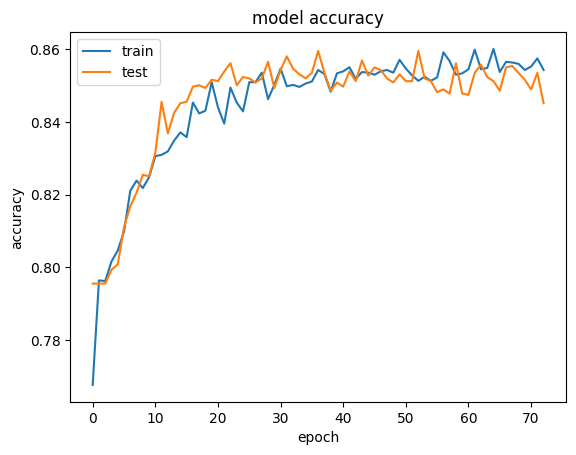

In [213]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Test Accuracy that is increasing ,and that is maintaining train accuracy the size is almost very less.**

**The training and testing accuracy improve steadily and stabilize around 0.86 after 20 epochs, showing the model has learned well. Training further doesn’t improve performance, indicating no overfitting or underfitting.**

# Summarize History for Loss

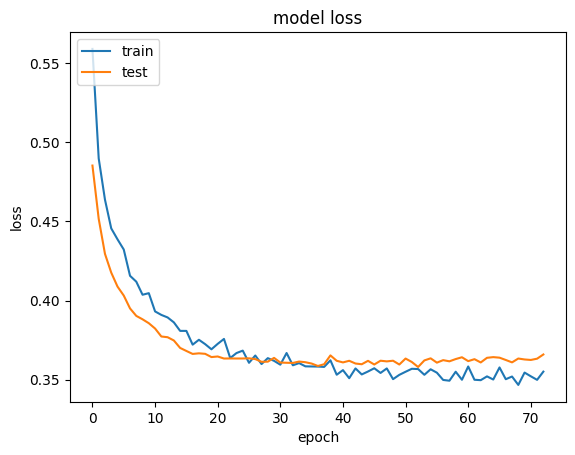

In [214]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**This plot shows the training and testing loss decreasing steadily over the epochs. Both losses drop quickly at the start and stabilize around 40 epochs, with the testing loss staying slightly higher than the training loss.**

**This suggests the model is learning well without significant overfitting.**

# Making the predictions and Evaluating the Model

In [215]:
# Predicting the Test Set Results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


# Make the Confusion Matrix

In [216]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm


array([[1555,   40],
       [ 235,  170]])

In [217]:
#Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.8625

# Get the Weights

In [218]:
classifier.get_weights()

[array([[ 0.03265378,  0.08433408,  0.2647045 ,  0.10221151, -0.06579594,
         -0.07813419, -0.11532553,  0.15797767, -0.08505186, -0.30707237,
         -0.11352257],
        [ 0.274207  , -0.6587507 , -0.52117205,  0.08369673,  0.30350214,
         -0.8536479 ,  0.9268149 ,  0.40055966,  0.02001219, -0.08568884,
          0.29434606],
        [-0.05716041,  0.03365182,  0.18323891,  0.11808553, -0.15662187,
         -0.03916195,  0.12565057,  0.14910443,  0.29174727,  0.22425155,
          0.16845086],
        [-0.6832568 ,  0.04119617, -0.5314208 ,  0.09901953,  0.5603572 ,
          0.43557182,  0.1917188 , -0.44060102, -0.20837788,  0.01095434,
          0.11519548],
        [-1.1528591 , -0.11065691, -0.00829495,  0.8826462 ,  0.91535777,
          0.4464099 ,  0.59280545, -0.04030341,  0.6584756 , -0.1216208 ,
         -1.0421894 ],
        [-0.05257471,  0.9193136 , -0.47711447,  0.09679295, -0.06569534,
         -0.47942612,  0.32645848,  0.2873716 ,  0.14959507,  0.0835867